RPA_Day6 정리  


메일 서비스 서버로부터 메일을 가져오기 위해 - imaplib, imapclient   
1. 메일 서비스 서버 객체 -  IMAPClient 
2. 로그인  login()


list_folders()  :  메일함 목록 반환   
select_folder(메일함이름, readonly=)  :  메일함 선택  
search(['ALL'], charset=) : mail id를 정수로 반환   
#INBOX, SINCE, FROM, TO, SUBJECT, UNSEEN,  FLAGGED, LARGER, SMALLER,   
gmail_search()   

fetch() - mail id를 사용해서 메일 내용 반환   
raw message (binary data형식)객체로부터 b'SEQ', b'FLAG', b'BODY'   

pyzmail 라이브러리.PyzMessage.factory(raw message[mail id][b'BODY']) - 가독 가능한 메시지 객체 반환    
message.get_subject()   
message.get_address('from')  
message.get_address('to')  
message.get('Date')  
message.text_part  텍스트 메일 본문 내용  
message.html_part  HTML 메일 본문 내용   
  
#첨부파일이 포함된 경우 message.multiparts 속성에 본문 내용, html내용, 첨부 파일 내용을 참조할 수 있습니다.  

message.multiparts [0]  
message.multiparts [1]  
message.multiparts [2]  
   
메일 내용 forward처리할 때 mail message객체 decode해서 제목을 수정해서 전달...   
decode_header   

   
프로그램 실행 관리 - os, subprocess,    
프로그램을 지정된 시간에 실행시키려면 - 파이썬의 이벤트 스케줄러 모듈 sched.scheduler()객체 생성 후   
enter(delay, priority, action, args=(), kwargs={})   
enterabs(atTime, priority, action, args=(), kwargs={})   
   
블러킹 - 순차적 방식     
non-blocking - 비동기방식, 병렬 처리 가능, threading 모듈 사용    
  
threading.Time(delay, action, arg=()) -> 예약된 작업 객체(thread 객체)    
thread객체.start()   
 
주기적으로 반복해서 프로그램 실행 시키려면 schedule모듈.every().seconds.do(작업)    
schedule모듈.every(n).minutes.do(작업)    
schedule모듈.every(n).hour.do(작업)  
schedule모듈.every().minute.at('09:30').do(작업)  
schedule모듈.every().day.at('18:00').do(작업)  

파이썬으로 만든 프로그램을 운영체제의 예약 작업 등록  
cron, schtasks 명령 사용  
schtasks /create 값 /tn /sc /mo /sd/ /ed 값 ,...  


### 사진관리 자동화

사진 관리 자동화   
• 스마트폰의 사진들을 컴퓨터로 내려받아서, 날짜 또는 장소별로 일괄 정리, 사진 크기 조절등 일괄 처리를 할 수 있다.

• PIL(Python Image Library) - 이미지 처리, 사진 관리를 위한 모듈

• PIL.Image.open(path) - 이미지 객체 생성

• PIL.Image.size - 이미지의 크기 반환

• PIL.Image.mode - 이미지 색상 정보 반환

• PIL.Image.format - 이미지의 파일 형식 반환

• PIL.Image.thumbnail((w, h)) - 이미지를 썸네일로 생성

In [1]:
! pip install Pillow

(5312, 2988)


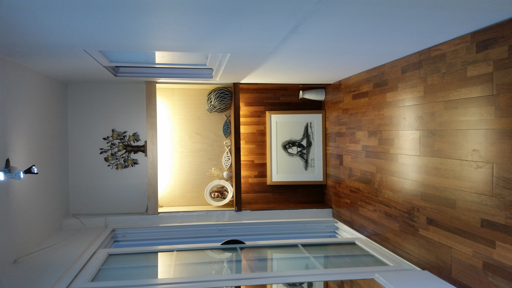

In [76]:
import glob
import cv2

fpath = glob.glob('./나.jpg')[0] # 적당한 사진을 하나 선택

from PIL import Image
img = Image.open(fpath)
#사진 이미지의 크기나, 색상과 같은 정보를 확인
#img = img.rotate(-90, resample=Image.BICUBIC, expand=True)  #사진 회전
print(img.size)  #사이즈 출력
img.mode
img.format
img.thumbnail((512,512))
img.size # 실제 변경된 크기 확인
img

• 데이터를 설명하는 메타 데이터로서 jpg파일에는 Exif(Exchangeable image file format)이 있다   
• 메타 데이터 – 데이터를 설명하는 데이터   
사진을 설명하는 데이터 – 찍은 시간, 조리개 노출 정도 , 셔터 스피드, 렌즈의 종류, 카메라 모듈    
• PIL 모듈.ExifTags 사전 - exif 태그 숫자와 의미를 문자열로 표시함   
• exif정보는 _getextif()를 이용해서 얻어낼 수 있다

In [30]:
! pip install image

  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19486 sha256=0da7e9bacf4d689ed0730801a112907d656da4a62e771aa45ccc8baedd352ca7
  Stored in directory: c:\users\fbvl\appdata\local\pip\cache\wheels\ac\30\5c\a8b33888bea3507eda7c924a143d34b2390d2ca5b145b327b5
Successfully built image


In [77]:
import PIL.Image
from PIL import ExifTags

#ExifTags.TAGS  #exif 태그 숫자와 의미를 문자열로 표시함 , 양이 많아서 주석처리

In [78]:
img._getexif()  #exif정보 

{36864: b'0220',
 37121: b'\x01\x02\x03\x00',
 37377: 4.9,
 36867: '2017:09:07 09:44:05',
 36868: '2017:09:07 09:44:05',
 37378: 2.27,
 37379: 2.09,
 37380: 0.0,
 37381: 2.28,
 37383: 5,
 37384: 0,
 37385: 0,
 37386: 4.8,
 37510: b"ASCII\x00\x00\x00\n\x00\x00\x00JKJK'\x03\xab\\\xab\x07\x01\x00\x10\x06\x01\x00\x00\x00\x00\x00L\x7f\x01\x00\x00\x00\x01\x00\xa2k\x01\x00\x01\x00\x00\x00\x00\xe8\x04\x00\x00\x82\x05\x00\x00\x9a\x01\x00J\x0c\x00\x00A2\x01\x00\x00\x00\x01\x00C\x89\x02\x00\x972\x01\x00\x00\x00\x01\x00\t\x87\x02\x00V\x83\x01\x00\xfa\x87\xff\xff\xb0\xf4\xff\xff\x06\xc7\xff\xff%0\x01\x00\xd5\x08\x00\x00n\r\x00\x001?\xff\xffa\xb3\x01\x00A3\x03\x00A3\x03\x00A3\x03\x00A3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00A3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00A3\x03\x00A3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00af\x06\x00Q3\x03\x00Q3\x03\x00Q3\x03\x00A3

In [79]:
exif_data = img._getexif()

#집합객체.srot() - 원본 객체 자체의 순서를 변경
#sorted(집합객체) - 정렬된 새로운 객체를 반환
#메타 정보의 숫자와 이름을 사전(dict)에 등록
for k, v in sorted(exif_data.items()):
    print('{:5d} 0x{:04x} {}: {}'.format(k, k, ExifTags.TAGS[k], v))

  256 0x0100 ImageWidth: 5312
  257 0x0101 ImageLength: 2988
  271 0x010f Make: samsung
  272 0x0110 Model: SM-G900K
  274 0x0112 Orientation: 6
  282 0x011a XResolution: 72.0
  283 0x011b YResolution: 72.0
  296 0x0128 ResolutionUnit: 2
  305 0x0131 Software: G900KKTU1CPL5
  306 0x0132 DateTime: 2017:09:07 09:44:05
  531 0x0213 YCbCrPositioning: 1
33434 0x829a ExposureTime: 0.03333333333333333
33437 0x829d FNumber: 2.2
34665 0x8769 ExifOffset: 238
34850 0x8822 ExposureProgram: 2
34853 0x8825 GPSInfo: {0: b'\x02\x02\x00\x00'}
34855 0x8827 ISOSpeedRatings: 100
36864 0x9000 ExifVersion: b'0220'
36867 0x9003 DateTimeOriginal: 2017:09:07 09:44:05
36868 0x9004 DateTimeDigitized: 2017:09:07 09:44:05
37121 0x9101 ComponentsConfiguration: b'\x01\x02\x03\x00'
37377 0x9201 ShutterSpeedValue: 4.9
37378 0x9202 ApertureValue: 2.27
37379 0x9203 BrightnessValue: 2.09
37380 0x9204 ExposureBiasValue: 0.0
37381 0x9205 MaxApertureValue: 2.28
37383 0x9207 MeteringMode: 5
37384 0x9208 LightSource: 0
37385 

In [80]:
exif_dat2 = {}  #메타정보 정수키, 심볼 텍스트, 값
for k, v in exif_data.items():
    exif_dat2[ExifTags.TAGS[k]] = v
    
exif_data.update(exif_dat2)

In [81]:
#제조사 및 카메라 모델을 확인
exif_data[271]
exif_data[272]

exif_data['Make']  #제조사
exif_data['Model']  #모델

'SM-G900K'

In [82]:
exif_data[274]
#스마트폰으로 찍은사진의 방향은 가로로 찍으면 1의 값을 갖는다.
exif_data['Orientation'] # 274

6

In [83]:
#해상도 단위는 2인 경우 인치이고, 3인 경우 센티멘터이다.
exif_data[296]
#XResolution(282), YResolution(283) 값은 보통 튜플(a, b)로 표현되는데, 이것은 exif에서 실수를 표현하는 방법으로
#a/b의 의미이다. 단위길이(inch 혹은 centimeter)당 픽셀 수를 나타낸다.
exif_data['XResolution'] # 72/1 DPI  단위 길이당 픽셀수

72.0

In [84]:
exif_data['ExposureTime']  #노출시간
exif_data['ApertureValue']  #조리개값

2.27

사진 관리 자동화 – 사진을 날짜별로 폴더에 저장   
• 단계 1 - 사진을 담을 폴더를 (없으면) 만든다.   
• 단계 2 - exif 정보를 읽는다.   
• 단계 3 - 사진찍은 날짜/시간에서 시간은 버리고 날짜만 취한다.   
• 단계 4 - 사진 저장할 경로와 폴더를 (필요하다면) 만든다.  
• 단계 5 - 사진을 복사한다.   
• 단계2 ~ 단계 6까지 반복  

In [87]:
import os
import glob
from PIL import Image
import shutil

In [102]:
#단계 1 - 사진을 담을 폴더를 (없으면) 만든다. 
dest_folder = 'photo\\sorted_by_date'
if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)
    
#단계 2 - exif 정보를 읽는다.
for fpath in glob.glob('photo\\*.jpg'):
    img = Image.open(fpath)
    exif_data = img._getexif()
    
    #3 - 사진찍은 날짜/시간에서 시간은 버리고 날짜만 추출
    try:
        date = exif_data[0x9003].split()[0].replace(':', '-')
    except KeyError: #날짜 정보가 없는 사진은 skip
        print('[SKIP]', fpath)
        continue
        
    #4 - 사진 저장할 날짜별 폴더 생성
    fname = os.path.split(fpath)[1]
    folder2save = os.path.join(dest_folder, date)
    fpath2save = os.path.join(folder2save, fname)
    if not os.path.exists(folder2save):
        os.makedirs(folder2save)
    #5 - 사진 복사
    shutil.copy(fpath, fpath2save)

[SKIP] photo\me.jpg
[SKIP] photo\띠나.jpg


In [ ]:
• 특정 날짜에 찍은사진들만 크기를 축소하여 photo\resized 폴더에 저장   
• thumbnail(max_width, max_height)

In [113]:
#이미지 축소 저장
#축소 사이즈 (256, 256) or (512, 512) or (1024, 1024)

srcfolder = 'photo'
dstfolder = 'photo\\resized'
maxwidth, maxheight = 512, 512
folder2save = os.path.join(dstfolder, 'thumbnail')

#저장 폴더 생성
if not os.path.exists(folder2save):
    os.makedirs(folder2save)

#dstfolder 폴더에서 .jpg 사진들을 Image객체로 생성, 메타정보 추출
#thumbnail()로 이미지 리사이징
#이미지 저장
for fpath in glob.glob(srcfolder + '\\*.jpg'):
    img = Image.open(fpath)
    exif_data = img._getexif()
    img.thumbnail((maxwidth, maxheight))
    fname = os.path.split(fpath)[1]
    fpath2save = os.path.join(folder2save, fname)
    img.save(fpath2save)
    print(fpath, '==>', fpath2save)

photo\flower.jpg ==> photo\resized\thumbnail\flower.jpg
photo\he.jpg ==> photo\resized\thumbnail\he.jpg
photo\home.jpg ==> photo\resized\thumbnail\home.jpg
photo\me.jpg ==> photo\resized\thumbnail\me.jpg
photo\나.jpg ==> photo\resized\thumbnail\나.jpg
photo\띠나.jpg ==> photo\resized\thumbnail\띠나.jpg


사진 관리 자동화 – 사진 오른쪽 아래 날짜와 시간 넣기   
• PIL 모듈.ImageFont객체 - truetype(font_file, size) - 트루타입폰트 파일 객체 생성    
• PIL 모듈.ImageDraw객체.text(xy, text, fill, font) - 텍스트 그리기    
• PIL 모듈.ImageDraw객체.textsize( text, font) - 출력할 텍스트의 가로세로 길이 정보 반환

In [137]:
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

#font = ImageFont.truetype('arial', 20)
font = ImageFont.truetype('arial.ttf', 20)
img = Image.open('photo/flower.jpg')
img = img.rotate(-90, resample=Image.BICUBIC, expand=True)
img.thumbnail((512, 512))
print(img.size)
draw = ImageDraw.Draw(img)
draw.text((10,10), 'Spring', (255, 255, 255), font) # 위치, 출력문자열, 색상, 폰트
img

draw.textsize('2021-04-08', font)
width, height = img.size

draw.text((width-102-10, height-19-10), '2021-04-08', (255, 255, 0), font)
img
img.save("new.png",'png')

(512, 512)


In [ ]:
• Image.rotate(angle, resample=0, expand=0) - 임의의 각으로 이미지 회전, resample은 이미지 재구성 보간법,
expand는 사이즈 변경

(264, 512)


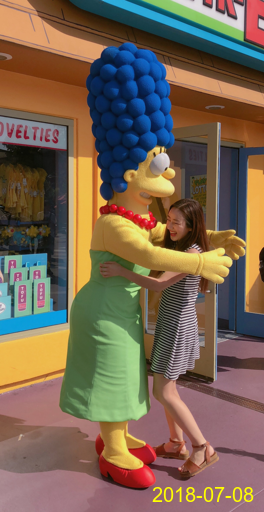

In [155]:
img = Image.open('./me2.jpg')
img.thumbnail((512, 512))

# 시계방향으로 90도 회전
#img = img.rotate(-90, resample=Image.BICUBIC, expand=True)
width, height = img.size
print(img.size)

draw = ImageDraw.Draw(img)
draw.text((width-102-10, height-19-10), '2018-07-08', (255, 255, 0), font)
img

• Image.transpose() - 90도 단위로 이미지 회전, 좌우 혹은 상하 이미지 반전 가능

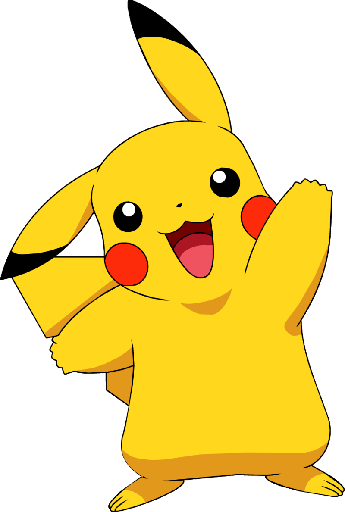

In [149]:
img = Image.open('./피카.png')
img.thumbnail((512, 512))

img1 = img.transpose(Image.FLIP_LEFT_RIGHT) # 좌우 뒤집기
img1

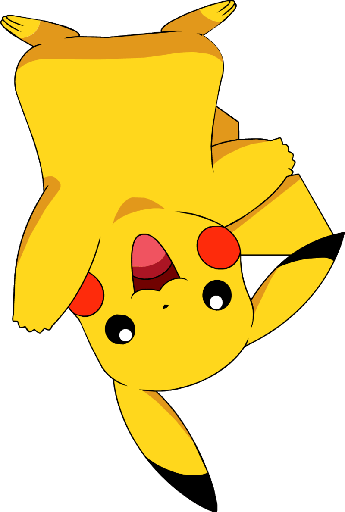

In [150]:
img2 = img.transpose(Image.FLIP_TOP_BOTTOM) # 상하 뒤집기
img2

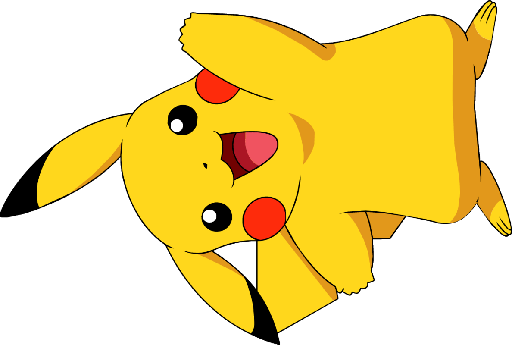

In [151]:
img = Image.open('./피카.png')
img.thumbnail((512, 512))

img3 = img.transpose(Image.TRANSPOSE) # 좌우 뒤집고, 반시계 방향으로 90도 회전
img3

사진 관리 자동화 – 사진에 장소 텍스트 넣기   
• 사진이 찍힌 장소는 스마트폰 카메라 앱으로 사진을 찍을 때 카메라 앱 설정 '위치 태그' 혹은 '위치 정보 저장' 기능이 켜져 있어야 함께 저장된다   
• 사진에 위치 정보 (GPS)는 reverse geocoding을 이용하여 실제 주소를 추출하고 사진에 주소를 넣을 수 있다

In [170]:
from PIL import Image, ExifTags

im = Image.open('./food.jpg')  #gps정보가 포함된 사진을 선택
exif_data = im._getexif()

exif_data[0x8825]  #gps 정보
ExifTags.GPSTAGS  #gps 정보 정수 키값과 심볼명 확인

gps_lat = exif_data[0x8825][2]  #위도(도, 분, 초)
gps_lon = exif_data[0x8825][4]  #경도

print(gps_lat)
print(gps_lon)

(37.0, 33.0, 36.52776)
(126.0, 59.0, 47.81508)


In [180]:
#각 값은 분수 형태로 실수를 의미함
#((37, 1)(7, 1)(59, 1)) => 37.1330555555556(십진수의 degree로 변환된 값)
#60초는 1분이고 60분은 1도 이므로...
def gps2deg(gps):  #(37.0, 7.0, 59.0)
    d = 1
    deg = 0.0
    for num in gps:
        deg += num / d
        d *= 60
    return deg
        
lat = gps2deg(gps_lat) #위도
lon = gps2deg(gps_lon) #경도
    

In [182]:
import webbrowser

url = 'http://www.google.co.kr/maps/place/{},{}'.format(lat,lon)
webbrowser.open(url)
print(url)

http://www.google.co.kr/maps/place/37.560146599999996,126.9966153


In [186]:
from IPython.display import IFrame
from IPython.core.display import display

google_maps_url = 'http://maps.google.com/maps?q={0}+{1}&ie=UTF8&t=h&z=14&output=embed'.format(lat, lon)
display(IFrame(google_maps_url, '800px', '500px'))

#지오코딩(geocoding):주소로부터 위경도 값을 얻어내는 것
#reverse geocoding: 경도값으로부터 주소를 얻어내는 것
#구글이 지원하는 지오코딩 및 역지오코딩 서비스가 유료로 전환
#(https://developeres.google.com/maps/documentation/geocoding/start)

In [188]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get('http://www.google.com/maps')
elem =driver.find_element_by_name('q')
elem.send_keys(f"{lat},{lon}" + Keys.RETURN)
time.sleep(5)
elem = driver.find_element_by_xpath('//*[@data-section-id]')
adrs = elem.text
driver.close()
adrs  #주소

'서울특별시 중구 필동2가 필동로 15-9'